# 一、基本信息

1. 实验名称：心血管疾病数据探索分析
2. 实验学时：2
3. 实验类别：综合性
4. 课程名称：数据分析基础（Python）
5. 课程编号：12002CC019


# 二、实验目的（预期学习效果）



本实验应符合课程总体学习要求，促进以下预期效果的达成：

* 掌握Python数据分析常用工具，具有应用Python编程语言及第三方库解决数据分析中实际问题能力。
* 掌握Python可视化常用工具，实现Python数据可视化操作，提高数据分析能力。
* 能够自行学习课堂中没有的知识，养成自行查阅文档的习惯。应用Python数据分析与可视化技术为信息管理、信息系统设计和信息技术创新创业提供技能准备。

涉及主要KT点包括：
* KT18_数据载入
* KT23_Matplotlib绘图基础
* KT24_Matplotlib设置Pyplot的动态rc参数
* KT25_Matplotlib的Pyplot中的常用绘图
* KT26_Seaborn风格设置
* KT27_Seaborn中的常用绘图

实验应当促使学生掌握相关KT点，并且在实际数据分析过程当中进行应用。



# 三、实验任务及原理



本次实验中，您将回答有关心血管疾病（CVD）数据集的问题，并预测患者是否存在心血管疾病（CVD）风险，完成相应代码区代码填写。

# 四、实验环境

实验仪器设备：计算机。

实验软件：Jupyter Notebook。

工具耗材：无。

# 五、实验预习任务



实验前，应复习本实验涉及的KT点，并完成前次布置的相关练习题目，并阅读相关参考性资料，做好实验前准备。

# 六、实验过程（实验方案）




## 心血管疾病数据探索分析

---



### 初步数据分析

导入挑战所需模块：

In [1]:
import warnings

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

warnings.filterwarnings("ignore")

本次挑战将优先选择 Seaborn 用于绘图，下面我们定义 Seaborn 全局绘图参数，保证后续图像更加整洁美观。

In [2]:
sns.set()
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

rcParams["figure.figsize"] = 11, 8

## **任务1** 数据载入
接下来，读取并预览数据集。

In [3]:
df = pd.read_csv("./data/mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


数据集特征表示如下：

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

所以数据均为医学检查时收集，主要包含 3 种类别的特征：

- Objective Feature: 基础事实数据。
- Examination Feature: 体检结果。
- Subjective Feature: 患者给出的主观信息。

接下来，我们探索数据值分布情况。这里使用 [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html) 绘制出变量特征的计数条形图。

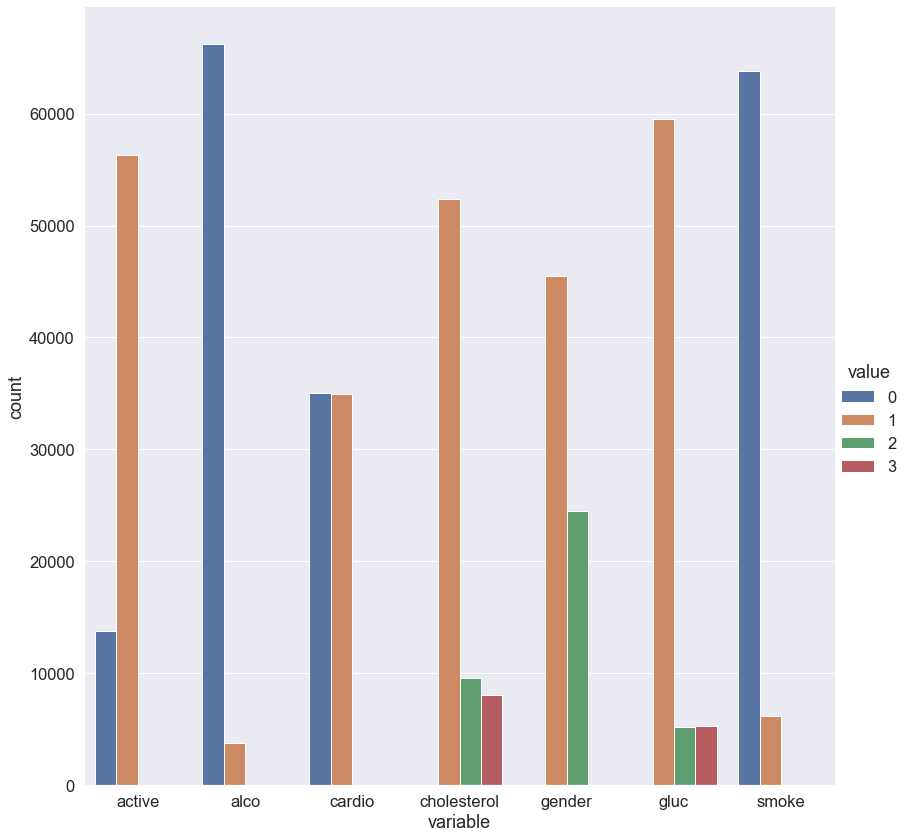

In [4]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar", height=12
)

接下来，让我们按目标值分割数据集，这样往往可以通过绘图结果快速找出相对重要的特征。

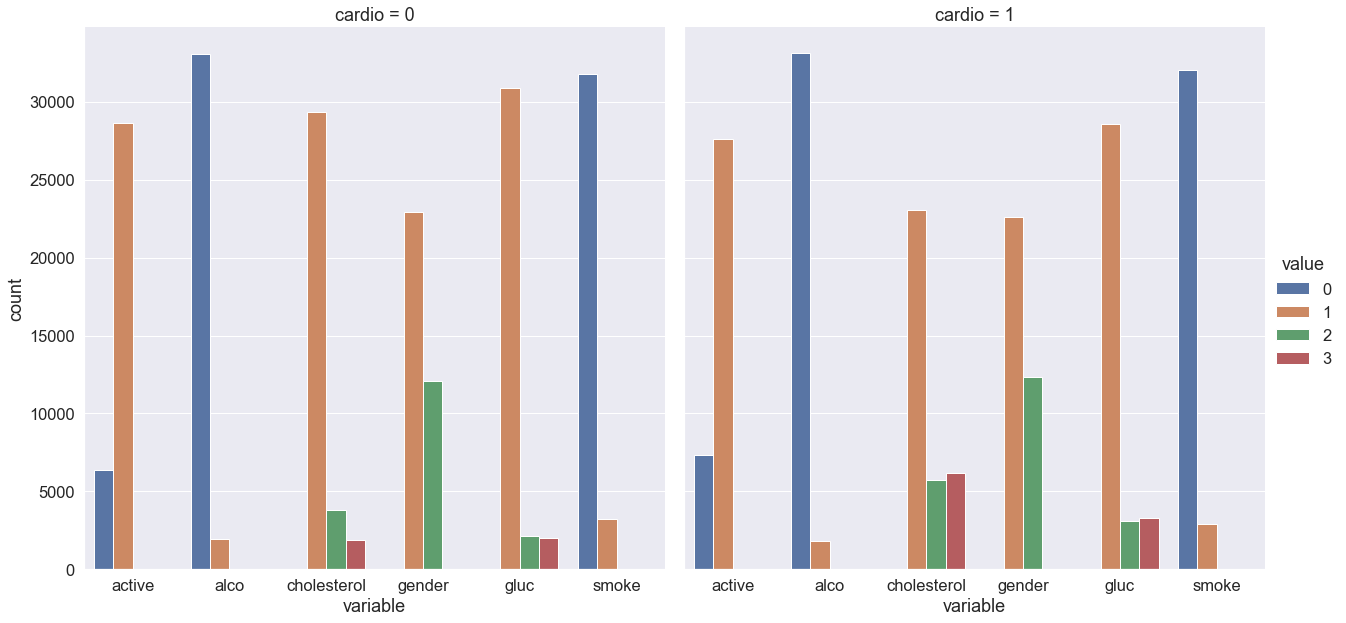

In [5]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
    height=9,
)

您可以看到胆固醇和葡萄糖水平对目标变量影响明显较大。这是巧合吗？

接下来，你需要自行补充必要的代码来回答相应的挑战问题。

---

## **任务2** 进一步探索数据
通过Pandas进一步对数据状况进行探索与分析。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>数据集中有多少男性和女性？由于 `gender` 特征没有说明男女，你需要通过分析身高计算得出。

- [ A ] 45530 女性 和 24470 男性
- [ B ] 45530 男性 和 24470 女性
- [ C ] 45470 女性 和 24530 男性
- [ D ] 45470 男性 和 24530 女性

In [6]:
df.groupby("gender")["height"].mean()
#gender为1为女性，gender为2为男性；数据集中有45530 女性 和 24470 男性，选A

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>数据集中男性和女性，哪个群体饮酒的频次更高？

- [ A ] 女性
- [ B ] 男性

In [7]:
df.groupby("gender")["alco"].mean()
#数据集中男性群体饮酒的频次更高，选B

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>数据集中男性和女性吸烟者所占百分比的差值是多少？

- [ A ] 4
- [ B ] 16
- [ C ] 20
- [ D ] 24

In [8]:
df.groupby("gender")["smoke"].mean()
round(100 * (df.loc[df["gender"] == 2, "smoke"].mean() - df.loc[df["gender"] == 1, "smoke"].mean()))
#数据集中男性和女性吸烟者所占百分比的差值是20，选C

20

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>数据集中吸烟者和非吸烟者的年龄中位数之间的差值（以月计）近似是多少？你需要尝试确定出数据集中 `age` 合理的表示单位。

- [ A ] 5
- [ B ] 10
- [ C ] 15
- [ D ] 20

本次挑战规定 1 年为 365.25 天。

In [9]:
df.groupby("smoke")["age"].median() / 365.25
(df[df["smoke"] == 0]["age"].median() - df[df["smoke"] == 1]["age"].median()) / 365.25 * 12
#数据集中吸烟者和非吸烟者的年龄中位数之间的差值（以月计）近似是20，选D

19.613963039014372

### 风险量表图

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>计算 $[60, 65)$ 年龄区间下，较健康人群（胆固醇类别 1，收缩压低于 120）与高风险人群（胆固醇类别为 3，收缩压 $[160, 180)$）各自心血管病患所占比例。并最终求得二者比例的近似倍数。

- [ A ] 1
- [ B ] 2
- [ C ] 3
- [ D ] 4

In [10]:
df["age_years"] = (df["age"] / 365.25).round().astype("int")
df["age_years"].max()

65

选择 $[60, 65)$ 年龄区间的吸烟男性：

In [11]:
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] >= 60)
    & (df["age_years"] < 65)
    & (df["smoke"] == 1)
]

计算胆固醇类别为 1，收缩压低于 120，心血管疾病患者的比例

In [12]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 1) & (smoking_old_men["ap_hi"] < 120)
]["cardio"].mean()

0.2631578947368421

计算胆固醇类别为 3，收缩压 $[160, 180)$，心血管疾病患者的比例

In [13]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 3)
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men["ap_hi"] < 180)
]["cardio"].mean()
#[60,65)年龄区间下，较健康人群心血管病患所占比例为0.2631578947368421，高风险人群各自心血管病患所占比例为0.8636363636363636
#并最终求得二者比例的近似倍数为3，选C

0.8636363636363636

最后计算两个比例的比值，得出问题答案。

### BMI 指数分析

挑战将需要创建一个新的特征 BMI，BMI 为身高体重指数，其可以反映体重的标准情况，计算公式为：

$$BMI = \frac{weight (kg)}{height^2 (m)}$$

正常 BMI 指数一般在 18.5 到 25 之间。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>请选择下面叙述正确的有：

- [ A ] 数据集样本中 BMI 中位数在正常范围内。
- [ B ] 女性的平均 BMI 指数高于男性。
- [ C ] 健康人群的 BMI 平均高于患病人群。
- [ D ] 健康和不饮酒男性 BMI 比健康不饮酒女性更接近正常值。

In [14]:
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2
df["BMI"].median()
df.groupby("gender")["BMI"].median()
df.groupby(["gender", "alco", "cardio"])["BMI"].median().to_frame()
#叙述正确的有：D

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

## **任务3** 数据清洗

你可能会注意到给出的数据并不够完美，在进一步可视化之前，我们需要对数据进行清洗。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>请按照以下列举的项目，过滤掉数据中统计有误的部分：

- 血压特征中，舒张压高于收缩压的样本。
- 身高特征中，低于 2.5％ 分位数的样本。
- 身高特征中，高于 97.5％ 分位数的样本。
- 体重特征中，低于 2.5％ 分位数的样本。
- 体重特征中，高于 97.5％ 分位数的样本。

百分位数请使用 `pd.Series.quantile` 方法进行确定，不熟悉可以阅读 [<i class="fa fa-external-link-square" aria-hidden="true"> 官方文档</i>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html)

In [15]:
filtered_df = df[(df["ap_lo"] <= df["ap_hi"]) & (df["height"] >= df["height"].quantile(0.025)) & (df["height"] <= df["height"].quantile(0.975)) & (df["weight"] >= df["weight"].quantile(0.025)) & (df["weight"] <= df["weight"].quantile(0.975))]

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>清洗掉的数据占原数据总量的近似百分比？

- [ A ] 8%
- [ B ] 9%
- [ C ] 10%
- [ D ] 11%

In [16]:
1 - filtered_df.shape[0] / df.shape[0]
#四舍五入清洗掉的数据占原数据总量的近似百分比为10%，选C

0.09630000000000005

## **任务4** 数据可视化分析

要更好地理解数据集特征，接下来使用过滤之后的数据创建特征之间相关系数的矩阵。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>使用 [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html) 绘制特征之间的皮尔逊相关性系数矩阵。

<AxesSubplot:>

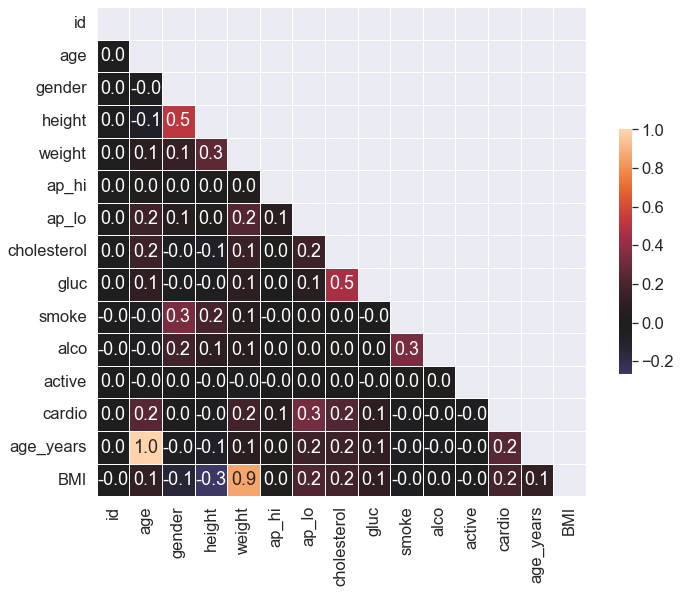

In [17]:
df = filtered_df.copy()
corr = df.corr(method="pearson")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
#Cardio, Cholesterol相关性为0.2；Height, Smoke相关性为0.2；Smoke, Alco相关性为0.3；Height, Weight相关性为0.3

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>以下哪组特征与性别的相关性更强？

- [ A ] Cardio, Cholesterol
- [ B ] Height, Smoke
- [ C ] Smoke, Alco
- [ D ] Height, Weight

### 男女身高分布

前面的探索中，我们知道性别对应 1 和 2，虽然不知道不同性别对应哪个值，但可以通过平均身高和体重来确定。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>绘制身高和性别之间的小提琴图 [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html)。

这里建议通过 `hue` 参数按性别划分，并通过 `scale` 参数来计算性别对应的具体数量。为了便于你能正确绘制，这里给出一个 [<i class="fa fa-external-link-square" aria-hidden="true"> 参考示例</i>](https://stackoverflow.com/questions/41573283/seaborn-violin-plot-with-one-data-per-column/41575149#41575149)。

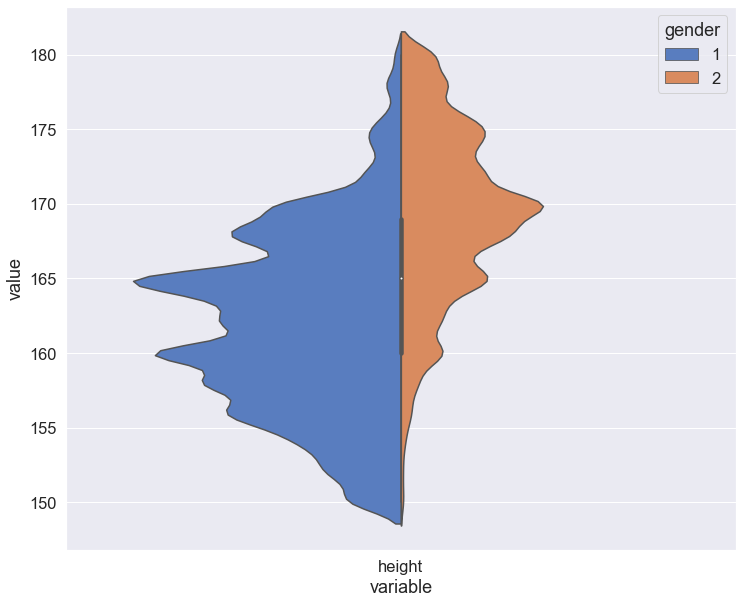

In [18]:
df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(x="variable", y="value", hue="gender", palette="muted", split=True, data=df_melt, scale="count", scale_hue=False)

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>绘制身高和性别之间的核密度图 [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)。

通过核密度图可以更清楚地看到性别之间的差异，但却无法得到每个性别对应的具体人数。

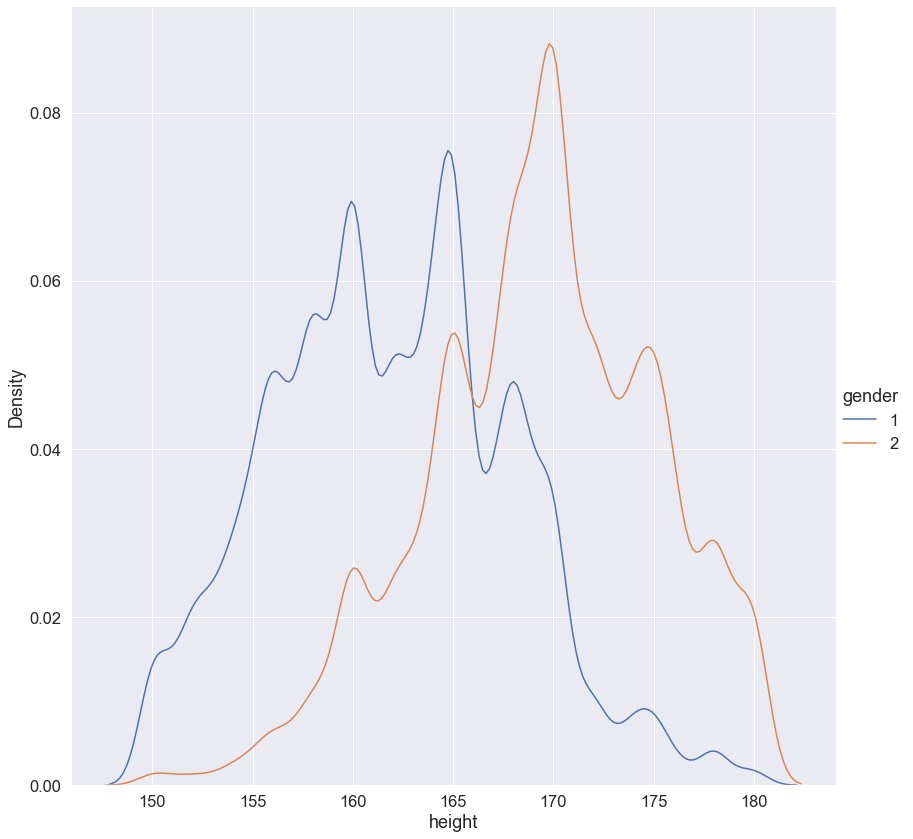

In [19]:
sns.FacetGrid(df, hue="gender", height=12).map(sns.kdeplot, "height").add_legend()

大多数情况下，皮尔逊相关性指数可以看出特征之间的相关程度。不过，这里我们进一步绘制 [<i class="fa fa-external-link-square" aria-hidden="true"> Spearman's rank correlation coefficient</i>](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) 斯皮尔曼等级相关系数对应的图像。它利用单调方程评价两个统计变量的相关性，是用于衡量两个变量的依赖性的非参数指标。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>使用 [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html) 绘制特征之间的斯皮尔曼等级相关系数矩阵。

<AxesSubplot:>

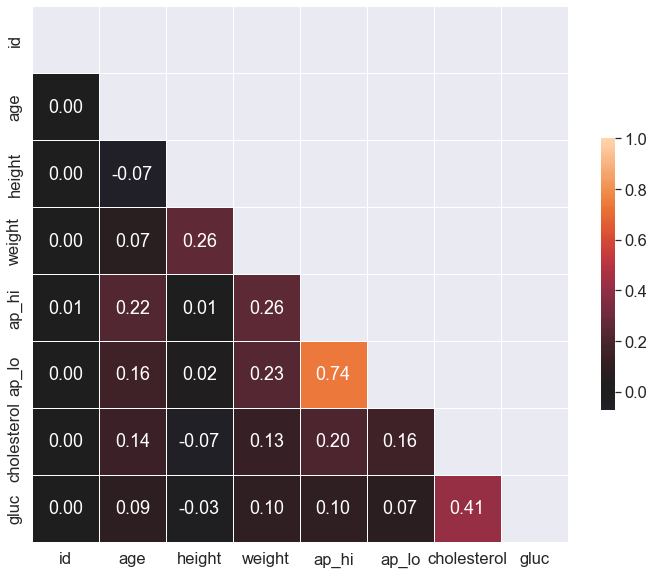

In [20]:
corr = df[["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]].corr(method="spearman")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
#Ap_hi, Ap_lo组特征具有最强的 Spearman 相关性，选E

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>下列那一组特征具有最强的 Spearman 相关性？

- [ A ] Height, Weight
- [ B ] Age, Weight
- [ C ] Cholesterol, Gluc
- [ D ] Cardio, Cholesterol
- [ E ] Ap_hi, Ap_lo
- [ F ] Smoke, Alco

### 年龄可视化

上面，我们已经计算过受访者的年龄。接下来，我们对其进行可视化。

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>请使用 [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) 绘制年龄分布计数图，横坐标为年龄，纵坐标为对应的人群数量。

<AxesSubplot:xlabel='age_years', ylabel='count'>

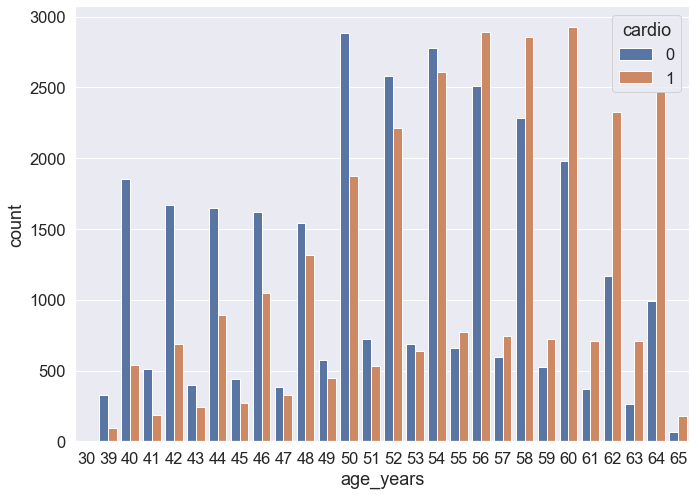

In [21]:
sns.countplot(x="age_years", hue="cardio", data=df)
#在年龄为55岁时，心血管疾病患者人数首次超过无心血管疾病患者人数，选B

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>在哪个年龄下，心血管疾病患者人数首次超过无心血管疾病患者人数？

- [ A ] 44
- [ B ] 55
- [ C ] 64
- [ D ]  70

---


# 七、实验课后任务



学生应当完成本次实验涉及相关任务，完成本次Jupyter Notebook实验报告以后，应将本实验报告文件（.ipynb）按照授课教师指定方式进行上传。


# 八、实验考核



实验满分100分，共4项任务，16个问题。问题1-问题4各自7分，其余问题每个6分。按照学生完成任务的程度、代码运行结果、分析结果等质量标准酌情给出对应分数。

# 九、实验资源



实验资源包括本笔记本文档及配属数据。

相关链接：
- [Matplotlib在线文档](http://matplotlib.org/)- [Matplotlib画廊](http://matplotlib.org/gallery.html)
- [Seaborn官方网站](https://seaborn.pydata.org/examples/index.html)
- [<i class="fa fa-external-link-square" aria-hidden="true"> 改编自：mlcourse.ai </i>](https://github.com/Yorko/mlcourse.ai/)
- [<i class="fa fa-external-link-square" aria-hidden="true"> 部分内容译者：实验楼</i>](https://www.shiyanlou.com/louplus/)